# EDA of Diamond Data for Diamond Price Prediction

In [1]:
#Importing neccessary libraries for eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Data Reading from the gemstone.csv file in data folder
df=pd.read_csv('data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
#Checking In the DF is there any missing value
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

There is no null value present in the dataset

There is null value present in the dataset

In [5]:
#Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [6]:
#Here the id column is not needed
#So we will drop the id Column for the Datafram
df.drop('id', axis=1, inplace=True)

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [8]:
#Checking for duplicated Values in The dataset
df.duplicated().sum()

np.int64(0)

There is no duplicate record found in the datafram

In [9]:
#Segregrate the numerical columns and categorical columns 
numerical_columns = df.columns[df.dtypes!='object']
categorical_columns = df.columns[df.dtypes=='object']
print('Numerical Columns:',numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical Columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


Now we have seperated the numerical and categorical features                                           
So its time to do Satistical analysis on both tyoe of features

In [10]:
#Satistical Analysis of The Numerical Features
print("Detail Info of The Numercial Features of the dataset:")
print(df[numerical_columns].describe())

Detail Info of The Numercial Features of the dataset:
               carat          depth          table              x  \
count  193573.000000  193573.000000  193573.000000  193573.000000   
mean        0.790688      61.820574      57.227675       5.715312   
std         0.462688       1.081704       1.918844       1.109422   
min         0.200000      52.100000      49.000000       0.000000   
25%         0.400000      61.300000      56.000000       4.700000   
50%         0.700000      61.900000      57.000000       5.700000   
75%         1.030000      62.400000      58.000000       6.510000   
max         3.500000      71.600000      79.000000       9.650000   

                   y              z          price  
count  193573.000000  193573.000000  193573.000000  
mean        5.720094       3.534246    3969.155414  
std         1.102333       0.688922    4034.374138  
min         0.000000       0.000000     326.000000  
25%         4.710000       2.900000     951.000000  
50%   

In [11]:
#Satistical Analysis of The Categorical Features
print("Detail Info of The Categorical Features of the dataset:")
print(df[categorical_columns].describe())

Detail Info of The Categorical Features of the dataset:
           cut   color clarity
count   193573  193573  193573
unique       5       7       8
top      Ideal       G     SI1
freq     92454   44391   53272


In [12]:
#Analysing the value count of unique categorical features
for i in categorical_columns:
    print("Value Count of {}=>\n".format(i))
    print(df[i].value_counts())

Value Count of cut=>

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
Value Count of color=>

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
Value Count of clarity=>

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64


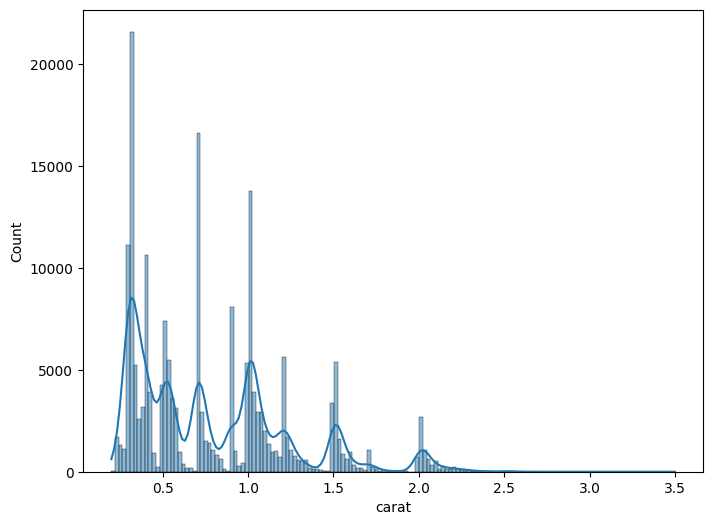

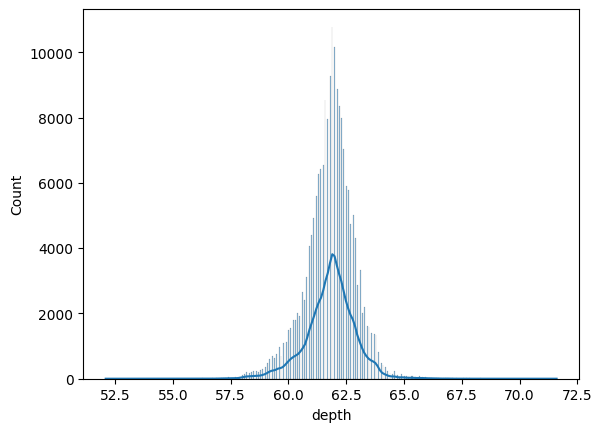

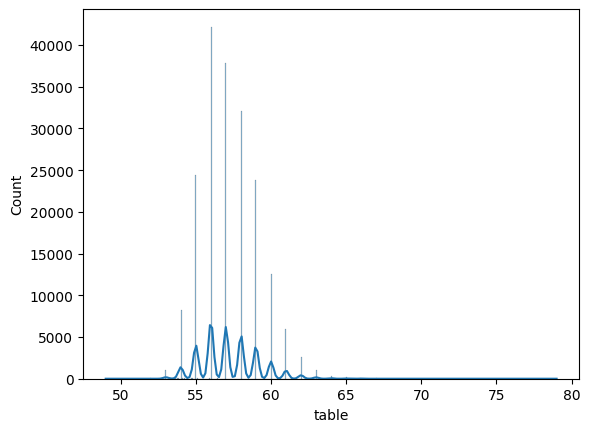

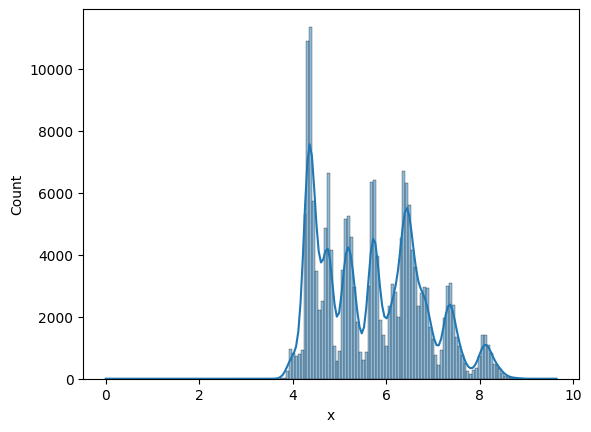

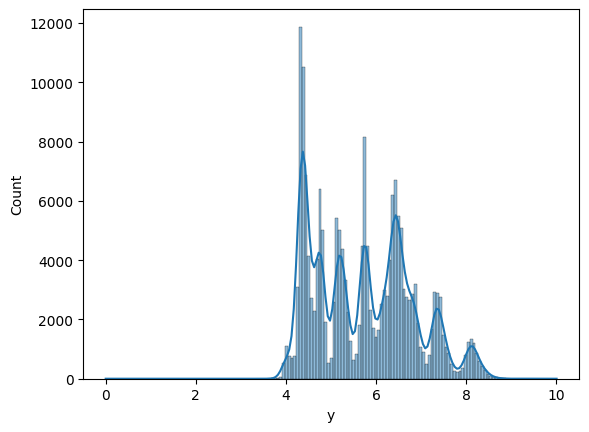

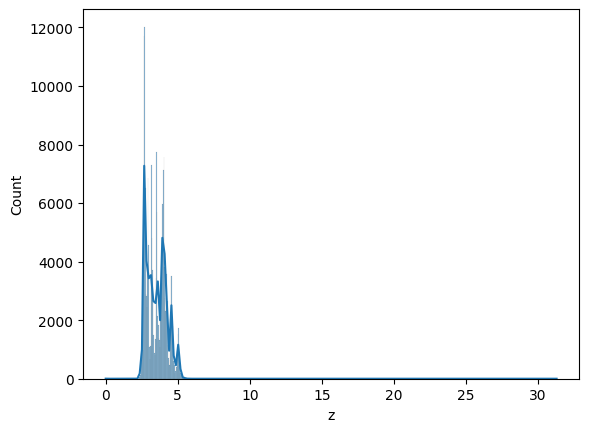

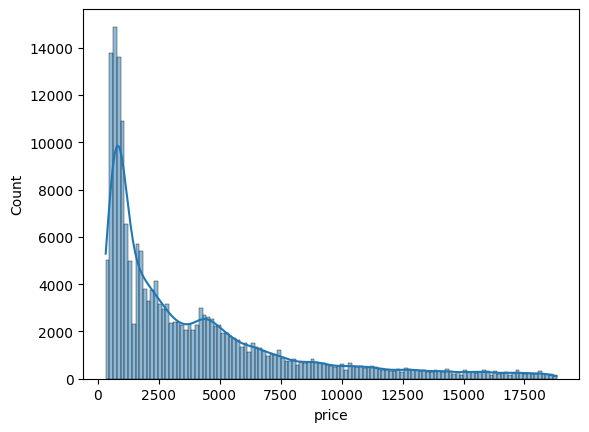

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plotting Histogram of numerical features
plt.figure(figsize=(8,6))
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

<Figure size 800x600 with 0 Axes>

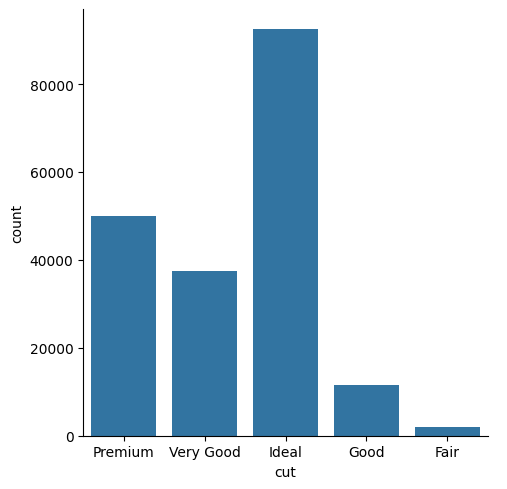

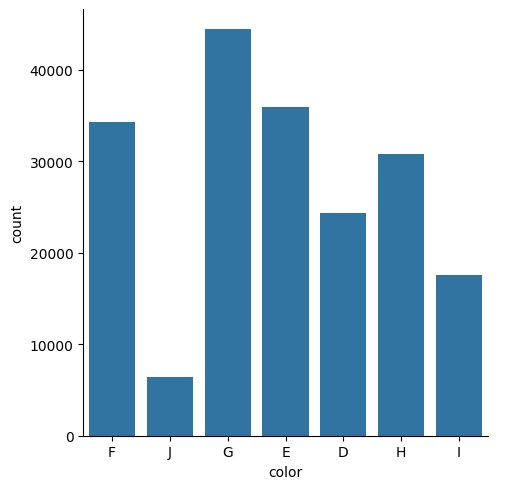

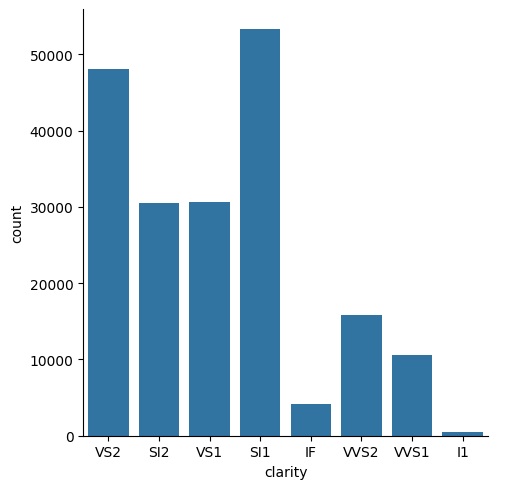

In [14]:

#Plotting Histogram of categorical features
plt.figure(figsize=(8,6))
for i in categorical_columns:
    sns.catplot(data=df,x=i,kind='count')
    print('\n')
    plt.show()

<Axes: >

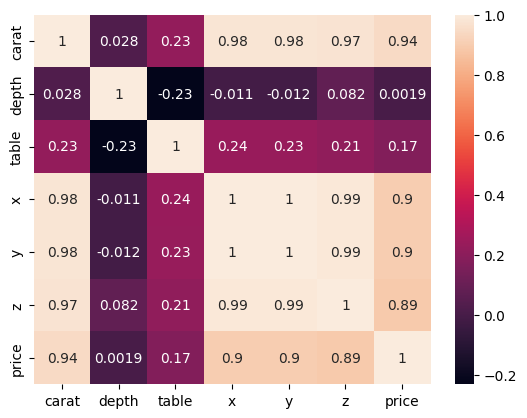

In [15]:
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [16]:
#Here the features x,y,z are highly correlated with each other AND with the carat feature 
#So I decided to drop the x,y and z columns to avoid multicollinearity
df.drop(labels=['x','y','z'],axis=1,inplace=True)

In [17]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,1.52,Premium,F,VS2,62.2,58.0,13619
1,2.03,Very Good,J,SI2,62.0,58.0,13387
2,0.70,Ideal,G,VS1,61.2,57.0,2772
3,0.32,Ideal,G,VS1,61.6,56.0,666
4,1.70,Premium,G,VS2,62.6,59.0,14453


In [18]:
df.cut.unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [19]:
cut_map={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}

In [20]:
clarity_map = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
clarity_map = {key:value for key, value in zip(clarity_map, range(1, 9))}
clarity_map

{'I1': 1,
 'SI2': 2,
 'SI1': 3,
 'VS2': 4,
 'VS1': 5,
 'VVS2': 6,
 'VVS1': 7,
 'IF': 8}

In [21]:
df.color.unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [22]:
color_map={'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7}

In [23]:
df['cut']=df.cut.map(cut_map)
df['clarity']=df.clarity.map(clarity_map)
df.color=df.color.map(color_map)

In [24]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,1.52,4,3,4,62.2,58.0,13619
1,2.03,3,7,2,62.0,58.0,13387
2,0.70,5,4,5,61.2,57.0,2772
3,0.32,5,4,5,61.6,56.0,666
4,1.70,4,4,4,62.6,59.0,14453


In [25]:
df.to_csv('data/eda_gemstone.csv',sep=',')

In [26]:
clarity_map.keys()

dict_keys(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])

In [27]:
df.clarity.unique

<bound method Series.unique of 0         4
1         2
2         5
3         5
4         4
         ..
193568    6
193569    6
193570    3
193571    3
193572    2
Name: clarity, Length: 193573, dtype: int64>

In [28]:
df1=pd.read_csv("../artifacts/processed_train_data.csv")
from sklearn.decomposition import PCA


In [29]:
pca=PCA(n_components=2)
df3 = pca.fit_transform(df1)

<Axes: >

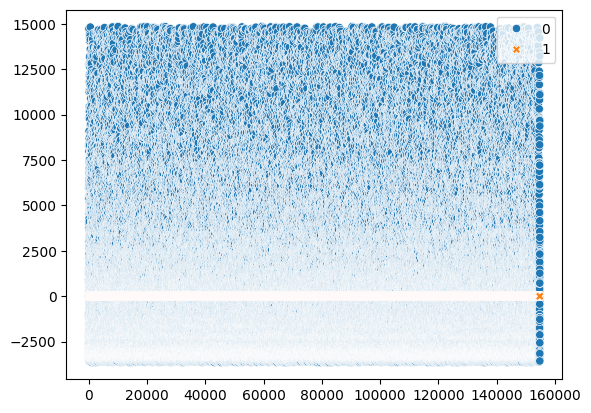

In [31]:
sns.scatterplot(df3)

In [33]:
# Initialize PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)

# Fit and transform the data
pca_result = pca.fit_transform(df1)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])

# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")


Explained Variance Ratio: [9.99999694e-01 9.54128869e-08]


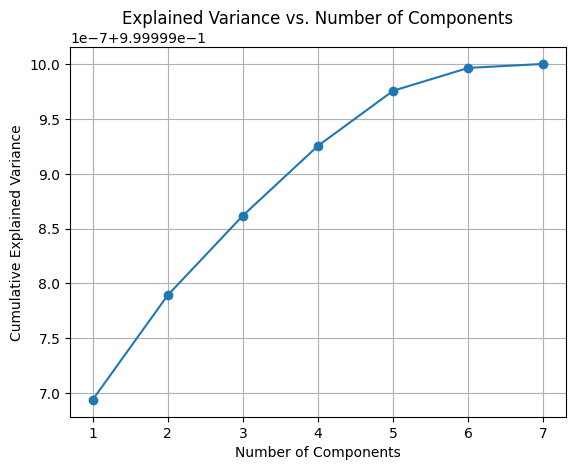

In [34]:
pca_all = PCA().fit(df1)
plt.plot(range(1, len(pca_all.explained_variance_ratio_)+1), 
         pca_all.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()
